# Ear Tracking tutorial

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import openalea.eartrack
import openalea.eartrack.eartrack as et_lib
import openalea.eartrack.binarisation_folder as st_lib
from openalea.deploy.shared_data import shared_data

## Get example images and parameters needed for segmentation and ear tracking

In [2]:
# Read images' information and create output folders
share_data_directory = shared_data(openalea.eartrack)
param_folder = os.path.join(share_data_directory, "parameters")
images_folder = os.path.join(share_data_directory, "images")

img_desc, parameters = st_lib.init(param_folder, images_folder, "", log=False)

## Selection of one plant and one imaging task

In [3]:
plant = img_desc.keys()[0]
task = img_desc[plant].keys()[0]

cabin = img_desc[plant][task]['cabin']

## Read images and show them

<IPython.core.display.Javascript object>


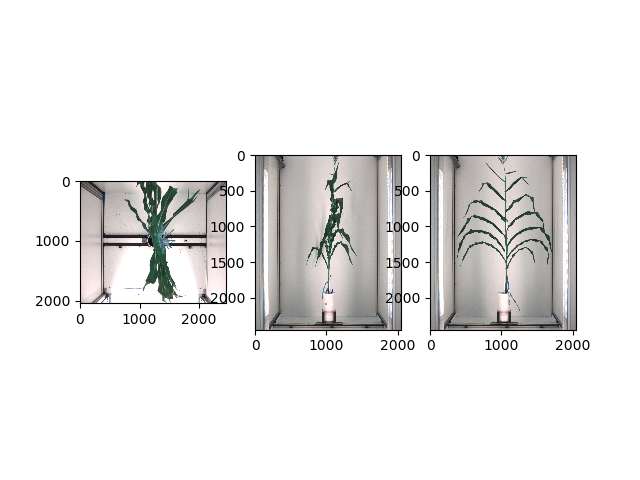

In [4]:
%matplotlib notebook
images = st_lib.read_images(img_desc, plant, task)
fig, axes = plt.subplots(nrows=1, ncols=3)
axlist = fig.get_axes()
axlist[0].imshow(images["top"][0])
axlist[1].imshow(images["side"][0])
axlist[2].imshow(images["side"][90])

## Compute binaries and show them

<IPython.core.display.Javascript object>


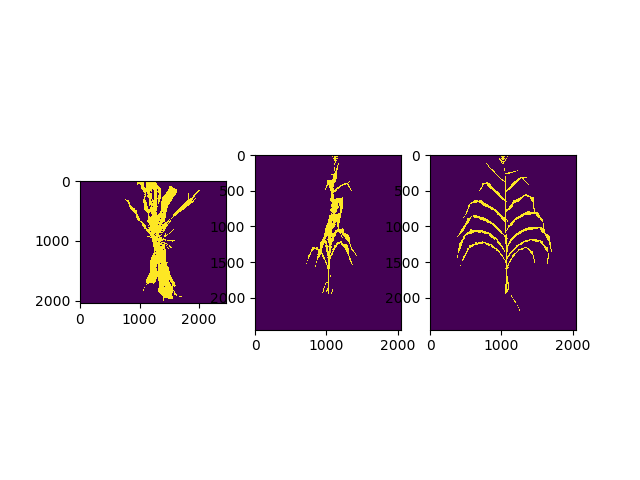

In [5]:
binaries, mask_top_center = st_lib.binaries_calculation(images, cabin, parameters)

fig, axes = plt.subplots(nrows=1, ncols=3)
axlist = fig.get_axes()
axlist[0].imshow(binaries["top"][0])
axlist[1].imshow(binaries["side"][0])
axlist[2].imshow(binaries["side"][90])

alpha = 14.0961431332
1903
a = 0.251111077577
max signed -550.297599265
alpha = 14.0961431332
alpha = 154.771692492
a = -0.471167880716
1888
a = 0.251111077577
max signed -928.530933101
alpha = 14.0961431332
alpha = 135.046663241
a = -0.998372470744


<IPython.core.display.Javascript object>


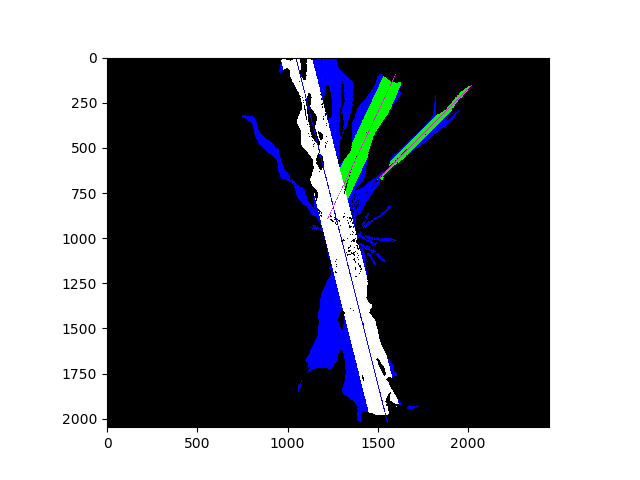

In [6]:
existing_angles = binaries["side"].keys()
angles_to_keep, result_img, top_log = et_lib.top_analyse(binaries["top"][0], existing_angles, mask_top_center)
fig = plt.figure()
plt.imshow(result_img)

In [7]:
kept_positions = np.empty([0, 3], 'int')
useful_kept_images = np.empty([0], 'int')
for angle in angles_to_keep:
    positions, imagesUtiles, side_log, img_debug = et_lib.side_analyse(binaries["side"][angle],
                                                                       images["side"][angle],
                                                                       angle,
                                                                       parameters[cabin]["side"]["pot_height"],
                                                                       parameters[cabin]["side"]["pot_width"])
    kept_positions = np.append(kept_positions, positions, axis=0)
    useful_kept_images = np.append(useful_kept_images, imagesUtiles, axis=0)

In [8]:
values = np.empty([0, 2], 'int')
im = np.empty([0], 'int')
for i in range(len(kept_positions)):
    for j in range(kept_positions[i, 2]):
        values = np.append(values, [kept_positions[i, 0:2]], axis=0)
        im = np.append(im, useful_kept_images[i])
mean_pos, finales_positions, final_kept_images = et_lib.robust_mean(values, im)
finales_positions = np.append(finales_positions, np.array([final_kept_images]).T, 1)

<IPython.core.display.Javascript object>


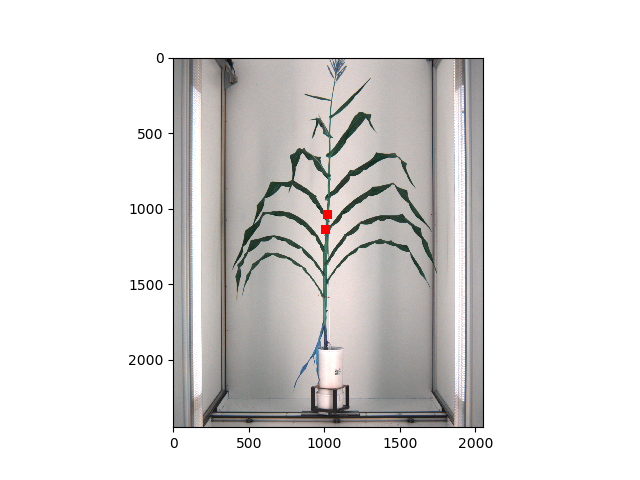

In [9]:
imageFinale = images["side"][finales_positions[0, 2]].copy()
if not (mean_pos == [-1, -1]).all():
    imageFinale[mean_pos[0] - 20:mean_pos[0] + 21, mean_pos[1]-20:mean_pos[1] + 21, :] = (255, 0, 0)
elif finales_positions.shape[0] == 2:
    for pos in finales_positions:
        imageFinale[pos[0] - 30:pos[0] + 31, pos[1] - 30:pos[1] + 31, :] = (255, 0, 0)
fig = plt.figure()
plt.imshow(imageFinale)